In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
from scipy import stats

## Overview

For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.



**Has the network latency gone up since we switched internet service providers?**

**Reword:** Is *network latency* greater with our current internet service provider than our previous.

- $H_0$: $\mu_{current-isr} = \mu_{prev-isr}$
- $H_a$: $\mu_{current-isr} > \mu_{prev-isr}$
- true positive: We correctly conclude there is enough evidence to suggest there is a difference
- true negative: We correctly conclude there is not enough evidence to suggest there is a difference
- type I errror (FP): We incorrectly conclude there is enough evidence to suggest there is a difference when there is
- type II error (FN): We incorrectly conclude there is not enough evidence to suggest there is a difference when there is

**Is the website redesign any good?**

- $H_0$: $\mu_{new} = \mu_{old}$
- $H_a$: $\mu_{new} > \mu_{old}$
- true positive: We correctly conclude there is enough evidence to suggest there is a difference
- true negative: We correctly conclude there is not enough evidence to suggest there is a difference
- type I errror (FP): We incorrectly conclude there is enough evidence to suggest there is a difference when there is
- type II error (FN): We incorrectly conclude there is not enough evidence to suggest there is a difference when there is

**Is our television ad driving more sales?**

**Reword:** Are *sales* greater with (after) our ad out?

- $H_0$: $\mu_{ad} = \mu_{no-ad}$
- $H_a$: $\mu_{ad} > \mu_{no-ad}$
- true positive: We correctly conclude there is enough evidence to suggest there is a difference
- true negative: We correctly conclude there is not enough evidence to suggest there is a difference
- type I errror (FP): We incorrectly conclude there is enough evidence to suggest there is a difference when there is
- type II error (FN): We incorrectly conclude there is not enough evidence to suggest there is a difference when there is

## Comparison of Means

**1.** Answer with the type of test you would use (assume normal distribution):

- Is there a difference in grades of students on the second floor compared to grades of all students?
    - One Sample T-Test (2-sided)
- Are adults who drink milk taller than adults who dont drink milk?
    - Independent (Two-Sample) T-Test (1-sided)
- Is the the price of gas higher in texas or in new mexico?
    - Independent (Two-Sample) T-Test (1-sided)
- Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?
    - ANOVA

**2.** Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [2]:
n_1 = 40
mu_1 = 90
std_1 = 15

n_2 = 50
mu_2 = 100
std_2 = 20

0. Plot Distributions

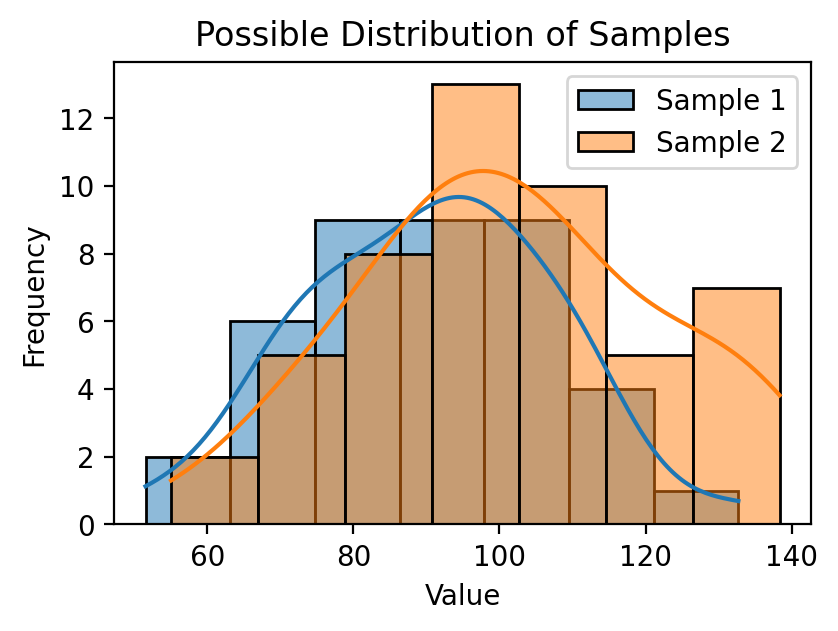

In [3]:
sample1 = np.random.normal(mu_1, std_1, n_1)
sample2 = np.random.normal(mu_2, std_2, n_2)

plt.figure(figsize=(4.5,3))
# Plot histogram for Sample 1
sns.histplot(sample1, kde=True, alpha=0.5, label='Sample 1')

# Plot histogram for Sample 2
sns.histplot(sample2, kde=True, alpha=0.5, label='Sample 2')

# Add labels and title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Possible Distribution of Samples')

# Add legend
plt.legend()

1. Set Hypotheses and significance level

H₀: μ₁ = μ₂

Hₐ: μ₁ ≠ μ₂


In [4]:
alpha =.05

2. Verify Assumptions

- Independence: We will assume the two offices are independent
- Equal Variance: Variances are not equal
- Normality: We can assume normality. The samples are large enough $n>30$

3. Compute t-stat and p-value

In [5]:
# Performing independent t-test
t_stat, p_value = stats.ttest_ind_from_stats(mu_1, std_1, n_1,
                                             mu_2, std_2, n_2, 
                                             equal_var=False,
                                             alternative='two-sided')

print(t_stat, p_value)

-2.7091418459143854 0.00811206270346016


4. Infer

In [6]:
if p_value < alpha:
    print("Reject the null hypothesis. The average time to sell homes is different for the two offices.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average time to sell homes.")


Reject the null hypothesis. The average time to sell homes is different for the two offices.


**3.** Load the mpg dataset and use it to answer the following questions:

In [7]:
from pydataset import data

In [8]:
mpg_df = data('mpg')
mpg_df.tail(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize
234,volkswagen,passat,3.6,2008,6,auto(s6),f,17,26,p,midsize


**Is there a difference in fuel-efficiency in cars from 2008 vs 1999?**


In [9]:
mpg_df['avg_mpg'] = (mpg_df['cty'] + mpg_df['hwy']) / 2

In [10]:
mpg_08 = mpg_df[mpg_df['year'] == 2008]
p_hat_08 = mpg_08['avg_mpg'].mean()

mpg_99 = mpg_df[mpg_df['year'] == 1999]
p_hat_99 = mpg_99['avg_mpg'].mean()

p_hat_08, p_hat_99

(20.076923076923077, 20.22222222222222)

0. Plot Distributions

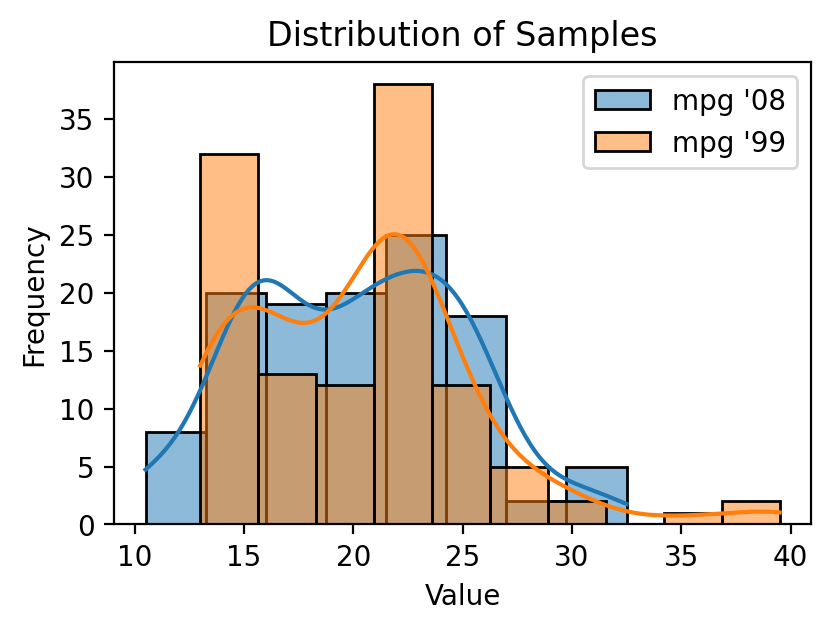

In [11]:
plt.figure(figsize=(4.5,3))
# Plot histogram for Sample 1
sns.histplot(mpg_08['avg_mpg'], kde=True, alpha=0.5, label="mpg '08")

# Plot histogram for Sample 2
sns.histplot(mpg_99['avg_mpg'], kde=True, alpha=0.5, label="mpg '99")

# Add labels and title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Samples')

# Add legend
plt.legend()

1. Set Hypotheses and significance level

H₀: μ₁ = μ₂

Hₐ: μ₁ ≠ μ₂


In [12]:
alpha =.05

2. Verify Assumptions

- Independence: We will assume the two offices are independent
- Normality: We can assume normality. The samples are large $n>30$

In [13]:
# sample sizes
mpg_df['year'].value_counts()

1999    117
2008    117
Name: year, dtype: int64

- Equal Variance: Variances are not equal

In [14]:
print(f"sample1 variance: {mpg_08['avg_mpg'].var()}")
print(f"sample2 variance: {mpg_99['avg_mpg'].var()}")

# Levene test
stat, p_levene = stats.levene(mpg_08['avg_mpg'], mpg_99['avg_mpg'])
print(f'Levene Test: stat={stat}, p_value={p_levene}')
if p_levene < .05:
    print('we cannot assume equal variances')
else:
    print('we will assume equal variances')

sample1 variance: 24.097480106100797
sample2 variance: 27.122605363984682
Levene Test: stat=0.033228136671080453, p_value=0.855517569468803
we will assume equal variances


3. Compute t-stat and p-value

In [15]:
t, p = stats.ttest_ind(mpg_08['avg_mpg'], mpg_99['avg_mpg'], equal_var=True)
t, p

(-0.21960177245940962, 0.8263744040323578)

4. Infer

In [16]:
if p < alpha:
    print("Reject the null hypothesis. The average mpg is different for the model years.")
else:
    print("Fail to reject the null hypothesis. The average mpg is not different for the model years.")


Fail to reject the null hypothesis. The average mpg is not different for the model years.


**Are compact cars more fuel-efficient than the average car?**


In [17]:
mpg_com = mpg_df[mpg_df['class'] == 'compact']
p_hat_com = mpg_com['avg_mpg'].mean()

p_hat = mpg_df['avg_mpg'].mean()

p_hat_com, p_hat

(24.21276595744681, 20.14957264957265)

0. Plot Distributions

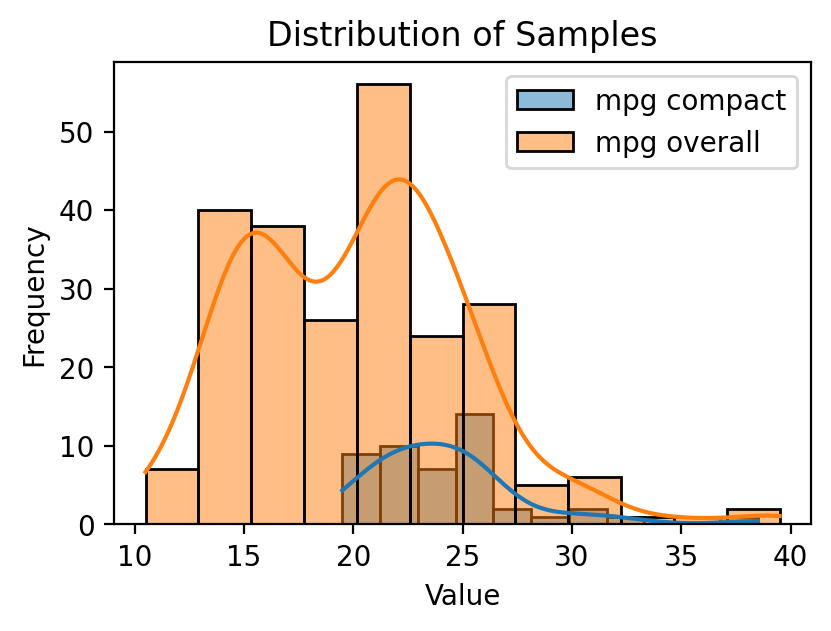

In [18]:
plt.figure(figsize=(4.5,3))
# Plot histogram for Sample 1
sns.histplot(mpg_com['avg_mpg'], kde=True, alpha=0.5, label="mpg compact")

# Plot histogram for Sample 2
sns.histplot(mpg_df['avg_mpg'], kde=True, alpha=0.5, label="mpg overall")

# Add labels and title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Samples')

# Add legend
plt.legend()

1. Set Hypotheses and significance level

H₀: μ₁ = μ

Hₐ: μ₁ < μ


In [19]:
alpha =.05

2. Verify Assumptions

- Normality: We can assume normality. The sample is large enough $n>30$

In [20]:
# sample sizes
mpg_df['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

3. Compute t-stat and p-value

In [21]:
t, p = stats.ttest_1samp(mpg_com['avg_mpg'], p_hat)
t, p/2

(7.896888573132533, 2.0992818971585816e-10)

4. Infer

In [27]:
if p/2 < alpha or t > 0:
    print("Reject the null hypothesis. The average mpg is more for compact cars.")
else:
    print("Fail to reject the null hypothesis. The average mpg is not more for compact cars.")


Reject the null hypothesis. The average mpg is more for compact cars.


**Do manual cars get better gas mileage than automatic cars?**

In [28]:
mpg_manual = mpg_df[mpg_df['trans'].str.startswith('manual')]
p_hat_manual = mpg_manual['avg_mpg'].mean()

mpg_auto = mpg_df[mpg_df['trans'].str.startswith('auto')]
p_hat_auto = mpg_auto['avg_mpg'].mean()

p_hat_auto, p_hat_manual

(19.130573248407643, 22.227272727272727)

0. Plot Distributions

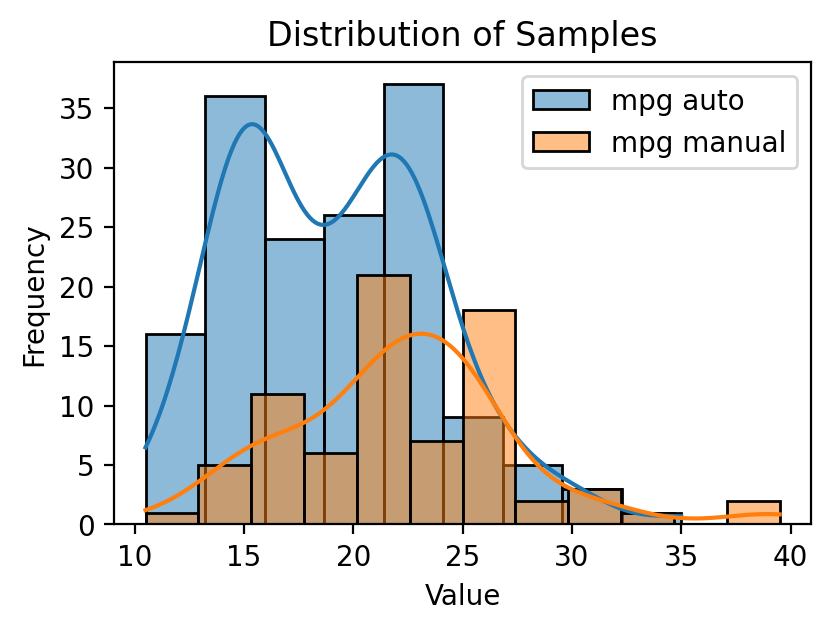

In [29]:
plt.figure(figsize=(4.5,3))
# Plot histogram for Sample 1
sns.histplot(mpg_auto['avg_mpg'], kde=True, alpha=0.5, label="mpg auto")

# Plot histogram for Sample 2
sns.histplot(mpg_manual['avg_mpg'], kde=True, alpha=0.5, label="mpg manual")

# Add labels and title to the plot
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Samples')

# Add legend
plt.legend()

1. Set Hypotheses and significance level

H₀: μ₁ = μ₂

Hₐ: μ₁ > μ₂


In [30]:
alpha =.05

2. Verify Assumptions

- Independence: We will assume the two offices are independent
- Normality: We can assume normality. The samples are large $n>30$

In [31]:
# sample sizes
mpg_df['trans'].value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

- Equal Variance: Variances are not equal

In [32]:
print(f"sample1 variance: {mpg_manual['avg_mpg'].var()}")
print(f"sample2 variance: {mpg_auto['avg_mpg'].var()}")

# Levene test
stat, p_levene = stats.levene(mpg_manual['avg_mpg'], mpg_auto['avg_mpg'])
print(f'Levene Test: stat={stat}, p_value={p_levene}')
if p_levene < .05:
    print('we cannot assume equal variances')
else:
    print('we will assume equal variances')

sample1 variance: 26.635167464114826
sample2 variance: 21.942777233382337
Levene Test: stat=0.20075824847529639, p_value=0.6545276355131857
we will assume equal variances


3. Compute t-stat and p-value

In [33]:
t, p = stats.ttest_ind(mpg_manual['avg_mpg'], mpg_auto['avg_mpg'], equal_var=True)
t, p/2

(4.593437735750014, 3.5771872005728416e-06)

4. Infer

In [34]:
if p/2 < alpha and t > 0:
    print("Reject the null hypothesis. The average mpg is more for manual cars.")
else:
    print("Fail to reject the null hypothesis. The average mpg is not more for the manual cars.")


Reject the null hypothesis. The average mpg is more for manual cars.


## Correlation

**1.** Answer with the type of stats test you would use (assume normal distribution):
- Is there a relationship between the length of your arm and the length of your foot?
- Do guys and gals quit their jobs at the same rate?
- Does the length of time of the lecture correlate with a students grade?

**2.** Use the telco_churn data.
- Does tenure correlate with monthly charges?
- Total charges?
- What happens if you control for phone and internet service?

**3.** Use the employees database.

In [37]:
import env
import datetime

In [38]:
sql = '''SELECT * FROM salaries'''
con = f'''mysql+pymysql://{env.user}:{env.pwd}@{env.host}/employees'''
employees_df = pd.read_sql(sql, con)
employees_df.head(3)

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10001,62102,1987-06-26,1988-06-25
2,10001,66074,1988-06-25,1989-06-25


In [41]:
employees_df['to_date'] = pd.to_datetime(employees_df['to_date'])
employees_df['from_date'] = pd.to_datetime(employees_df['from_date'])
display(employees_df.dtypes)
employees_df.head(3)

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 9999-01-01 00:00:00 present at position 16

In [23]:
mpg_df['avg_mpg'] = (mpg_df['cty'] + mpg_df['hwy']) / 2

- Is there a relationship between how long an employee has been with the company and their salary?


In [29]:
mpg_com.dtypes

manufacturer     object
model            object
displ           float64
year              int64
cyl               int64
trans            object
drv              object
cty               int64
hwy               int64
fl               object
class            object
avg_mpg         float64
dtype: object

- Is there a relationship between how long an employee has been with the company and the number of titles they have had?

**4.** Use the sleepstudy data.
- Is there a relationship between days and reaction time?

In [43]:
sleepstudy = data('sleepstudy')
sleepstudy.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


## Comparison of Groups

**1.** Answer with the type of stats test you would use (assume normal distribution):

- Do students get better test grades if they have a rubber duck on their desk?
    - a
- Does smoking affect when or not someone has lung cancer?
    - a
- Is gender independent of a person’s blood type?
    - a
- A farming company wants to know if a new fertilizer has improved crop yield or not
    - a
- Does the length of time of the lecture correlate with a students grade?
    - a
- Do people with dogs live in apartments more than people with cats?
    - a

**2.** Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

|                       | Codeup Student | Not Codeup Student |
|-----------------------|----------------|-------------------|
| Uses a Macbook        |  49            | 20           |
| Doesn't Use a Macbook |  1             | 30              |


**3.** Choose another 2 categorical variables from the mpg dataset and perform a $chi^2$
 contingency table test with them. Be sure to state your null and alternative hypotheses.

**4.** Use the data from the employees database to answer these questions:

- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

In [46]:
sql = '''SELECT dept_name, emp_no, gender, to_date
         FROM departments
             JOIN dept_emp USING (dept_no)
             JOIN employees USING (emp_no)
             WHERE (dept_name = 'Sales' OR dept_name = 'Marketing')
                 AND to_date > NOW();'''
con = f'''mysql+pymysql://{env.user}:{env.pwd}@{env.host}/employees'''
employees_df = pd.read_sql(sql, con)
employees_df.head(3)

,dept_name,emp_no,gender,to_date
0,Marketing,10017,F,9999-01-01
1,Marketing,10058,M,9999-01-01
2,Marketing,10140,F,9999-01-01


- Is an employee's gender independent of whether or not they are or have been a manager?

## More exercises

Choose several continous and categorical variables that were not covered in the lesson and perform each type of test on them. You may use another data set if you wish.

In [ ]:
employees_df.corr()